## TFIM (磁化, EE, 横磁場, 分割しない, 周期境界条件なし)

\[
H = - J \sum_i S_i^z S_{i+1}^z \;-\; h_x \sum_i S_i^x
\]

In [2]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
from pathlib import Path
from datetime import datetime
import matplotlib.patheffects as pe
from matplotlib.gridspec import GridSpec
import matplotlib.patheffects as pe

In [3]:
# ============
## 準備
T_total, nt = 20.0, 400
tlist = np.linspace(0.0, T_total, nt)
# ============
## 実行部
# cut_pos = N // 2 - 1
# sx, sy, sz = [0.5*M for M in (qt.sigmax(), qt.sigmay(), qt.sigmaz())]
# I2 = qt.qeye(2)
# # iのスピン演算子に関するハミルトニアンの項
# Sx = [op_at(i, sx) for i in range(N)]
# Sy = [op_at(i, sy) for i in range(N)]
# Sz = [op_at(i, sz) for i in range(N)]
# # ハミルトニアン
# ## 分割するボンド
# H_cut_unit = H_exchange(cut_pos)
# ## それ以外のボンド
# H_exchange_unit = sum(H_exchange(i) for i in range(N) if i != cut_pos)
# ## 横磁場項
# H_trans_unit = sum(H_trans(i) for i in range(N))
# H_full = -J * (H_exchange_unit + H_cut_unit) - h[0] * H_trans_unit
# H_static = -J * H_exchange_unit - h[0] * H_trans_unit
# left_sides = [i for i in range(cut_pos + 1)]
# _, psi_ground = H_full.groundstate(sparse=True)
# solver_opts = dict(store_states=False, progress_bar = None, rtol = 1e-6, atol=1e-8, nsteps=20000)
# ============


# まとめて N, h, J, T_cutをパラメータとして 
def simulate(N, J, hx_list):
    sx, sy, sz = qt.sigmax(), qt.sigmay(), qt.sigmaz()
    I2 = qt.qeye(2)

    # ============
    # ハミルトニアン構築
    def op_at(i, op):
        return qt.tensor([op if k == i else I2 for k in range(N)])

    Sx = [op_at(i, sx) for i in range(N)]
    Sy = [op_at(i, sy) for i in range(N)]
    Sz = [op_at(i, sz) for i in range(N)]
    
    # イジング相互作用項
    def H_exchange(i):
        return (Sz[i] * Sz[i+1])
    
    # 横磁場項
    def H_trans(i):
        return Sx[i]
    # ============
    H_exchange_unit = sum(H_exchange(i) for i in range(N-1))
    H_trans_unit = sum(H_trans(i) for i in range(N))
    # H_full = -J * (H_exchange_unit) - hx * H_trans_unit
    # _, psi0 = H_full.groundstate(sparse=True)
    solver_opts = dict(store_states=False, progress_bar = None, rtol = 1e-6, atol=1e-8, nsteps=20000)
    Sx_tot, Sz_tot = sum(Sx), sum(Sz)
    # ============
    ## sigma_xとsigma_zの期待値をそれぞれプロット
    hx_arr = np.asarray(hx_list, dtype=float)
    Mx_vals, Mz_vals, SA_vals = [], [], []

    left_side = list(range(N//2))
    for hx in hx_arr:
        H_full = -J * H_exchange_unit - hx * H_trans_unit
        _, psi0 = H_full.groundstate(sparse=True)

        # テスト
        # H_test = - 1.0 * H_exchange_unit
        # e0, psi0 = H_test.groundstate(sparse=True)
        # print(e0)
        # print(psi0)
        # return

        # 磁化
        Mx_vals.append(2.0/N * qt.expect(Sx_tot, psi0))
        Mz_vals.append(2.0/N * qt.expect(Sz_tot, psi0))

        # EE
        rhoL = psi0.ptrace(left_side)
        SA_vals.append(qt.entropy_vn(rhoL, base=2))
        
    return (
        (hx_arr, np.real_if_close(Mx_vals)),
        (hx_arr, np.real_if_close(Mz_vals)),
        (hx_arr, np.asarray(SA_vals, dtype=float)),
    )




/Users/naoki/Desktop/RESEARCH/実験/venv/lib/python3.13/site-packages/qutip/core/qobj.py:1769: UserWarning: Ground state may be degenerate.
  warnings.warn("Ground state may be degenerate.", UserWarning)
/Users/naoki/Desktop/RESEARCH/実験/venv/lib/python3.13/site-packages/qutip/core/qobj.py:1769: UserWarning: Ground state may be degenerate.
  warnings.warn("Ground state may be degenerate.", UserWarning)


N is 4
  hx = 0.0 : S_A = 0.683062
  hx = 0.1 : S_A = 0.999697  <= peak
  hx = 0.2 : S_A = 0.995188
  hx = 0.3 : S_A = 0.976488
  hx = 0.4 : S_A = 0.931652
  hx = 0.5 : S_A = 0.855787
  hx = 0.6 : S_A = 0.757128
  hx = 0.7 : S_A = 0.651753
  hx = 0.8 : S_A = 0.553276
  hx = 0.9 : S_A = 0.46833
  hx = 1.0 : S_A = 0.39805
  hx = 1.1 : S_A = 0.340913
  hx = 1.2 : S_A = 0.294623
  hx = 1.3 : S_A = 0.25697
  hx = 1.4 : S_A = 0.226106
  hx = 1.5 : S_A = 0.200572
  hx = 1.6 : S_A = 0.17924
  hx = 1.7 : S_A = 0.16125
  hx = 1.8 : S_A = 0.145939
  hx = 1.9 : S_A = 0.1328
  hx = 2.0 : S_A = 0.121436
  hx = 2.1 : S_A = 0.111536
  hx = 2.2 : S_A = 0.102856
  hx = 2.3 : S_A = 0.0951987
  hx = 2.4 : S_A = 0.0884062
  hx = 2.6 : S_A = 0.0823503
  hx = 2.7 : S_A = 0.0769255
  hx = 2.8 : S_A = 0.0720451
  hx = 2.9 : S_A = 0.0676368
  hx = 3.0 : S_A = 0.06364
  hx = 3.1 : S_A = 0.0600039
  hx = 3.2 : S_A = 0.0566851
  hx = 3.3 : S_A = 0.0536469
  hx = 3.4 : S_A = 0.0508577
  hx = 3.5 : S_A = 0.0482903
 

/Users/naoki/Desktop/RESEARCH/実験/venv/lib/python3.13/site-packages/qutip/core/qobj.py:1769: UserWarning: Ground state may be degenerate.
  warnings.warn("Ground state may be degenerate.", UserWarning)


N is 8
  hx = 0.0 : S_A = 0.219773
  hx = 0.1 : S_A = 1.00001
  hx = 0.2 : S_A = 1.00012
  hx = 0.3 : S_A = 1.00039  <= peak
  hx = 0.4 : S_A = 0.999675
  hx = 0.5 : S_A = 0.991978
  hx = 0.6 : S_A = 0.960513
  hx = 0.7 : S_A = 0.881594
  hx = 0.8 : S_A = 0.754303
  hx = 0.9 : S_A = 0.613966
  hx = 1.0 : S_A = 0.493456
  hx = 1.1 : S_A = 0.401259
  hx = 1.2 : S_A = 0.332812
  hx = 1.3 : S_A = 0.281537
  hx = 1.4 : S_A = 0.242267
  hx = 1.5 : S_A = 0.211455
  hx = 1.6 : S_A = 0.186739
  hx = 1.7 : S_A = 0.166527
  hx = 1.8 : S_A = 0.149727
  hx = 1.9 : S_A = 0.135567
  hx = 2.0 : S_A = 0.12349
  hx = 2.1 : S_A = 0.113084
  hx = 2.2 : S_A = 0.104038
  hx = 2.3 : S_A = 0.0961118
  hx = 2.4 : S_A = 0.0891199
  hx = 2.6 : S_A = 0.0829138
  hx = 2.7 : S_A = 0.0773748
  hx = 2.8 : S_A = 0.0724064
  hx = 2.9 : S_A = 0.0679297
  hx = 3.0 : S_A = 0.0638793
  hx = 3.1 : S_A = 0.0602007
  hx = 3.2 : S_A = 0.056848
  hx = 3.3 : S_A = 0.0537826
  hx = 3.4 : S_A = 0.0509714
  hx = 3.5 : S_A = 0.04838

/Users/naoki/Desktop/RESEARCH/実験/venv/lib/python3.13/site-packages/qutip/core/qobj.py:1769: UserWarning: Ground state may be degenerate.
  warnings.warn("Ground state may be degenerate.", UserWarning)


N is 10
  hx = 0.0 : S_A = 0.87452
  hx = 0.1 : S_A = 1.00001
  hx = 0.2 : S_A = 1.00013
  hx = 0.3 : S_A = 1.00059
  hx = 0.4 : S_A = 1.00149  <= peak
  hx = 0.5 : S_A = 1.00122
  hx = 0.6 : S_A = 0.990252
  hx = 0.7 : S_A = 0.941053
  hx = 0.8 : S_A = 0.82394
  hx = 0.9 : S_A = 0.664628
  hx = 1.0 : S_A = 0.521036
  hx = 1.1 : S_A = 0.414594
  hx = 1.2 : S_A = 0.339113
  hx = 1.3 : S_A = 0.284573
  hx = 1.4 : S_A = 0.24378
  hx = 1.5 : S_A = 0.212239
  hx = 1.6 : S_A = 0.187161
  hx = 1.7 : S_A = 0.166762
  hx = 1.8 : S_A = 0.149862
  hx = 1.9 : S_A = 0.135647
  hx = 2.0 : S_A = 0.123539
  hx = 2.1 : S_A = 0.113114
  hx = 2.2 : S_A = 0.104057
  hx = 2.3 : S_A = 0.0961245
  hx = 2.4 : S_A = 0.0891283
  hx = 2.6 : S_A = 0.0829195
  hx = 2.7 : S_A = 0.0773786
  hx = 2.8 : S_A = 0.0724091
  hx = 2.9 : S_A = 0.0679316
  hx = 3.0 : S_A = 0.0638806
  hx = 3.1 : S_A = 0.0602016
  hx = 3.2 : S_A = 0.0568487
  hx = 3.3 : S_A = 0.0537831
  hx = 3.4 : S_A = 0.0509718
  hx = 3.5 : S_A = 0.0483864

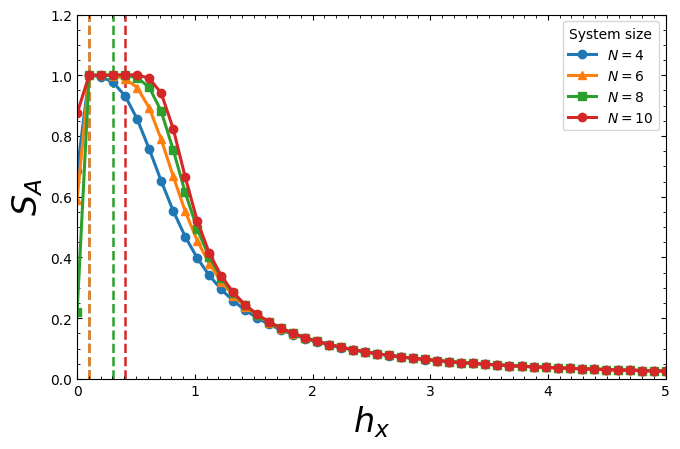

In [4]:
N_list = [4, 6, 8, 10]
J = 1.0
hx_list = np.linspace(0.0, 5.0)
markers = ['o', '^', 's']

hx_targets = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5], dtype=float)

fig3, ax3 = plt.subplots(figsize=(6.9, 4.6))

for i, N in enumerate(N_list):
    (xs, Mx), (_, Mz), (_, SA) = simulate(N=N, J=J, hx_list=hx_list)

    def label_at(ax, x, y, text, *, coord='data', dx_pt=8, fontsize=14, color=None):
        kw = dict(ha='left', va='center', fontsize=fontsize, xytext=(dx_pt, 0), textcoords='offset points', 
        path_effects=[pe.withStroke(linewidth=3, foreground='white')], clip_on=False, zorder=6)
        if color is not None:
            kw['color'] = color
        if coord == 'axes':
            ax.annotate(text, xy=(x, y), xycoords=ax.transAxes, **kw)
        else:
            ax.annotate(text, xy=(x, y), xycoords='data', **kw)
    
    def inward_ticks(ax, major_len=7, minor_len=4, width=1.2):
        ax.minorticks_on()
        ax.tick_params(which='both', direction='in', top=True, right=True, length=major_len, width=width)
        ax.tick_params(which='minor', length=minor_len, width=width)
    
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.style.use('default')
    mpl.rcParams.update({
        "axes.labelsize": 18,   # 軸ラベル
        "xtick.labelsize": 16,  # 目盛り数字
        "ytick.labelsize": 16,
        "lines.linewidth": 2.2, # 線の太さ
        "axes.titlesize": 16,
    })

    print(f"N is {N}")
    # 基底状態でEE最大となる横磁場の値に縦線
    SA_arr = np.asarray(SA, dtype=float)
    xs_arr = np.asarray(xs, dtype=float)
    idx_peak = int(np.nanargmax(SA_arr))
    x_peak = xs_arr[idx_peak]
    y_peak = SA_arr[idx_peak]
    for h, s in zip(xs, SA):
        tag = "  <= peak" if np.isclose(h, x_peak) else ""
        print(f"  hx = {h:>3.1f} : S_A = {s:.6g}{tag}")

    # ===== Figure 1 =====
    # pos1 = [3.5, 0.8]
    # fig1, ax1 = plt.subplots(figsize=(6.9, 4.6))
    # ax1.plot(xs, Mx, marker='o', markevery=1)
    # ax1.tick_params(direction='in', which='both', top=True, right=True)
    # ax1.minorticks_on()
    # ax1.set_xlim(0.0, 5.0)
    # ax1.set_ylim(0.0, 1.0)
    # ax1.set_xlabel(r"$h_x$", fontsize=24)
    # ax1.set_ylabel(r"$M_x$", fontsize=24)
    # ax1.xaxis.set_major_locator(MultipleLocator(1.0))
    # ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
    # ax1.set_title("")
    # label_at(ax1,  pos1[0],pos1[1], fr"$J = 1.0$", coord='data', fontsize=18)
    # fig1.tight_layout()
    
    # ===== Figure 2 =====
    # pos1 = [3.5, -0.4]
    # fig2, ax2 = plt.subplots(figsize=(6.9, 4.6))
    # ax2.plot(xs, Mz, marker='o', markevery=1)
    # ax2.tick_params(direction='in', which='both', top=True, right=True)
    # ax2.minorticks_on()
    # ax2.set_xlim(0.0, 5.0)
    # ax2.set_ylim(-0.5, 0.1)
    # ax2.set_xlabel(r"$h_x$", fontsize=24)
    # ax2.set_ylabel(r"$M_z$", fontsize=24)
    # ax2.xaxis.set_major_locator(MultipleLocator(1.0))
    # ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
    # ax2.set_title("")
    # label_at(ax2, pos1[0],pos1[1], fr"$J = 1.0$",  coord='data', fontsize=18)
    # fig2.tight_layout()
    
    # ===== Figure 3 =====
    pos1 = [3.5, 1.0]
    mk = markers[i % len(markers)]
    ln, = ax3.plot(xs, SA, marker=mk, markevery=1, label=fr"$N={N}$")
    ax3.tick_params(direction='in', which='both', top=True, right=True)
    ax3.minorticks_on()
    ax3.set_xlim(0.0, 0.2)
    ax3.xaxis.set_major_locator(MultipleLocator(1.0))
    ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax3.set_ylim(0.9, 1.2)
    ax3.set_xlabel(r"$h_x$", fontsize=24)
    ax3.set_ylabel(r"$S_A$", fontsize=24)
    ax3.set_title("")
    ax3.axvline(x_peak, linestyle='--', color=ln.get_color(), linewidth=1.8, zorder=1)
    
    # label_at(ax3, pos1[0],pos1[1], fr"$J = 1.0$", coord='data', fontsize=18)
    # 右上に表示（軸座標：左下=0,0 右上=1,1）
    # label_at(ax3, 0.03, 0.10, fr"{x_peak:.1f}", coord='axes', fontsize=14, color='red')
    fig3.tight_layout()
    
    # fig1, fig2, fig3
    OUTDIR = Path("../charts/TFIM")
    # fig1.savefig(OUTDIR/"Mx.pdf", bbox_inches="tight", dpi=300)
    # fig2.savefig(OUTDIR/"Mz.pdf", bbox_inches="tight", dpi=300)
    # fig3.savefig(OUTDIR/f"EE_{N}.pdf", bbox_inches="tight", dpi=300)
    
ax3.legend(loc="best", title="System size")

# fig3.savefig(OUTDIR/f"EE_multi_N.pdf", bbox_inches="tight", dpi=300)

plt.show()